# Data Preprocessing

In [43]:
# import tensorflow as tf
# import tensorflow.keras.backend as K
# import os
# import numpy as np
# import pandas as pd
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense,Activation,Dropout,InputLayer
# from tensorflow.keras.layers import LSTM
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error,mean_absolute_error
# from tensorflow.keras.losses import MeanSquaredError
# from tensorflow.keras.metrics import RootMeanSquaredError
# import matplotlib.pyplot as plt
# import time
# import math
# import seaborn as sns
# from sklearn.metrics import *
# from math import sqrt
# from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.callbacks import TensorBoard
# from sklearn.metrics import r2_score
# import matplotlib.pyplot as plt

In [26]:
# from google.colab import drive
# drive.mount('/content/drive')

In [27]:
import pandas as pd
data = pd.read_csv('F:\VidyutAI\data\satelite_hourly_data.csv')
# Clear the dataset
data=data.dropna()


<>:2: SyntaxWarning: invalid escape sequence '\V'
<>:2: SyntaxWarning: invalid escape sequence '\V'
C:\Users\Magnet\AppData\Local\Temp\ipykernel_23072\329879646.py:2: SyntaxWarning: invalid escape sequence '\V'
  data = pd.read_csv('F:\VidyutAI\data\satelite_hourly_data.csv')


In [28]:
data.head(2)

,DY,MO,HR,solar radiation,module_temp,wind direction,wind speed,power
0,1,1,6,70.077,17.175,1.99,3.8,28.702
1,1,1,7,312.699,22.702,1.90,4.6,159.778


In [29]:
# Build Timestamp
# data['datetime_str'] = data.apply(lambda row: f"{row['YEAR']}-{row['MO']}-{row['DY']} {row['HR']}:{row['min']}:{row['sec']}", axis=1)
# use the below line instead of the above line i think this will reduce chances of error
data['datetime_str'] = data.apply(lambda row: f"{int(row['MO'])}-{int(row['DY'])} {int(row['HR'])}", axis=1)
data['timestamp'] = pd.to_datetime(data['datetime_str'], format='%m-%d %H')
# data['timestamp'] = pd.to_datetime(data['datetime_str'], format='%Y-%m-%d %H:%M:%S')

columns_to_drop = ["DY", "MO", "HR"]
data = data.drop(columns=columns_to_drop)
timestamp_col = data.pop('timestamp')
data.insert(0, 'Date Time', timestamp_col)
# Update Labels
data = data.rename(columns={'ambient_temp': 'Temp (degC)'})
data.set_index('Date Time', inplace=True)

# Display few rows
data.head(2)


,solar radiation,module_temp,wind direction,wind speed,power,datetime_str
Date Time,,,,,,
1900-01-01 06:00:00,70.077,17.175,1.99,3.8,28.702,1-1 6
1900-01-01 07:00:00,312.699,22.702,1.90,4.6,159.778,1-1 7


In [30]:
data.head(2)

,solar radiation,module_temp,wind direction,wind speed,power,datetime_str
Date Time,,,,,,
1900-01-01 06:00:00,70.077,17.175,1.99,3.8,28.702,1-1 6
1900-01-01 07:00:00,312.699,22.702,1.90,4.6,159.778,1-1 7


In [31]:
# # Timestamp vs Temp Plot
# temp = data['Temp (degC)']
# temp.plot()
# #temp=data['power']
# #temp.plot()

In [32]:
data = pd.read_csv('F:\VidyutAI\data\satelite_hourly_data.csv')
#data = pd.read_csv("landbase_yearly_data_2.csv") #aagaru thila
data=data.dropna()

# data=data[data.ambient_temp !=999]
#data=data[455000:460000] ata bghi aagru thila
data_corr=data.copy()
# data_corr=data_corr.drop(columns=["module_temp","MO","DY"])
data1=data.copy()
#data1=data[["Time hr","Solar Radiation"]].copy() ata bhi
data1.head()

<>:1: SyntaxWarning: invalid escape sequence '\V'
<>:1: SyntaxWarning: invalid escape sequence '\V'
C:\Users\Magnet\AppData\Local\Temp\ipykernel_23072\2426498606.py:1: SyntaxWarning: invalid escape sequence '\V'
  data = pd.read_csv('F:\VidyutAI\data\satelite_hourly_data.csv')


,DY,MO,HR,solar radiation,module_temp,wind direction,wind speed,power
0,1,1,6,70.077,17.175,1.99,3.8,28.702
1,1,1,7,312.699,22.702,1.90,4.6,159.778
2,1,1,8,549.085,27.316,2.14,5.5,279.990
3,1,1,9,735.121,31.169,1.66,6.1,366.577
4,1,1,10,850.934,33.919,1.57,6.4,417.275


                           DY            MO            HR  solar radiation  \
DY               1.000000e+00  1.189318e-02 -2.232133e-16        -0.025835   
MO               1.189318e-02  1.000000e+00 -1.017636e-15        -0.114215   
HR              -2.232133e-16 -1.017636e-15  1.000000e+00        -0.370601   
solar radiation -2.583538e-02 -1.142146e-01 -3.706012e-01         1.000000   
module_temp      8.312866e-04 -1.384804e-01 -2.749683e-01         0.862722   
wind direction  -6.318354e-02 -3.265225e-02 -7.596639e-02         0.014545   
wind speed      -1.011498e-01 -8.472739e-02 -2.669205e-01         0.079633   
power           -2.859319e-02 -1.030186e-01 -3.848159e-01         0.997315   

                 module_temp  wind direction  wind speed     power  
DY                  0.000831       -0.063184   -0.101150 -0.028593  
MO                 -0.138480       -0.032652   -0.084727 -0.103019  
HR                 -0.274968       -0.075966   -0.266920 -0.384816  
solar radiation     0

<Axes: >

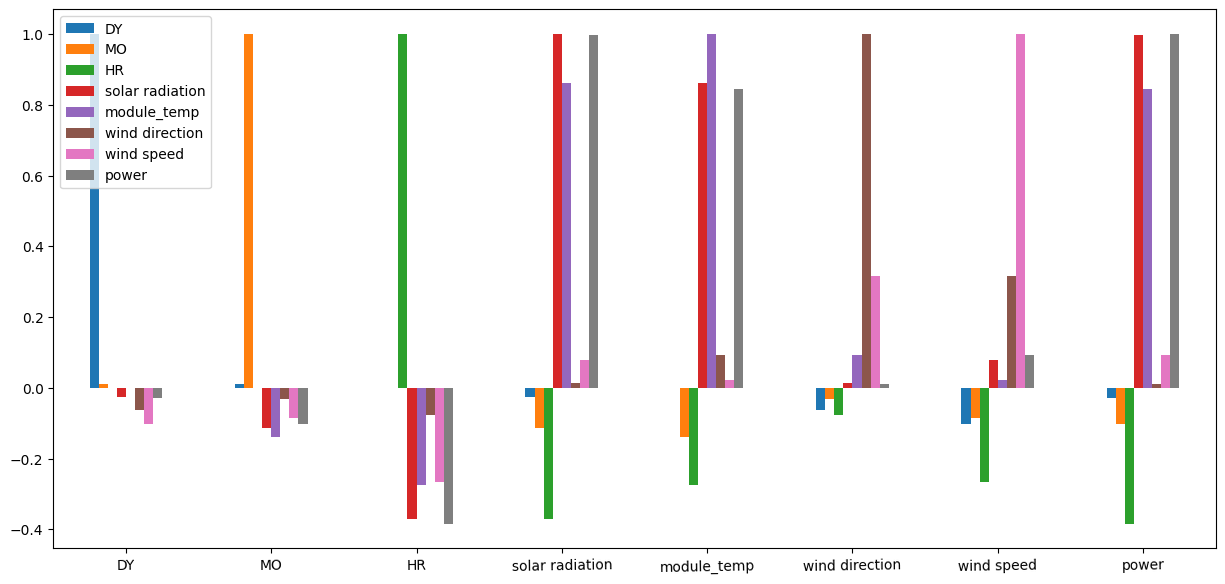

In [33]:
pl=data_corr.corr(method ='pearson')
print(pl)
pl.plot.bar(figsize=(15, 7),rot=1)
#plt.savefig('foo.png')

power              1.000000
solar radiation    0.997315
module_temp        0.844093
HR                 0.384816
MO                 0.103019
wind speed         0.092132
DY                 0.028593
wind direction     0.011131
Name: power, dtype: float64


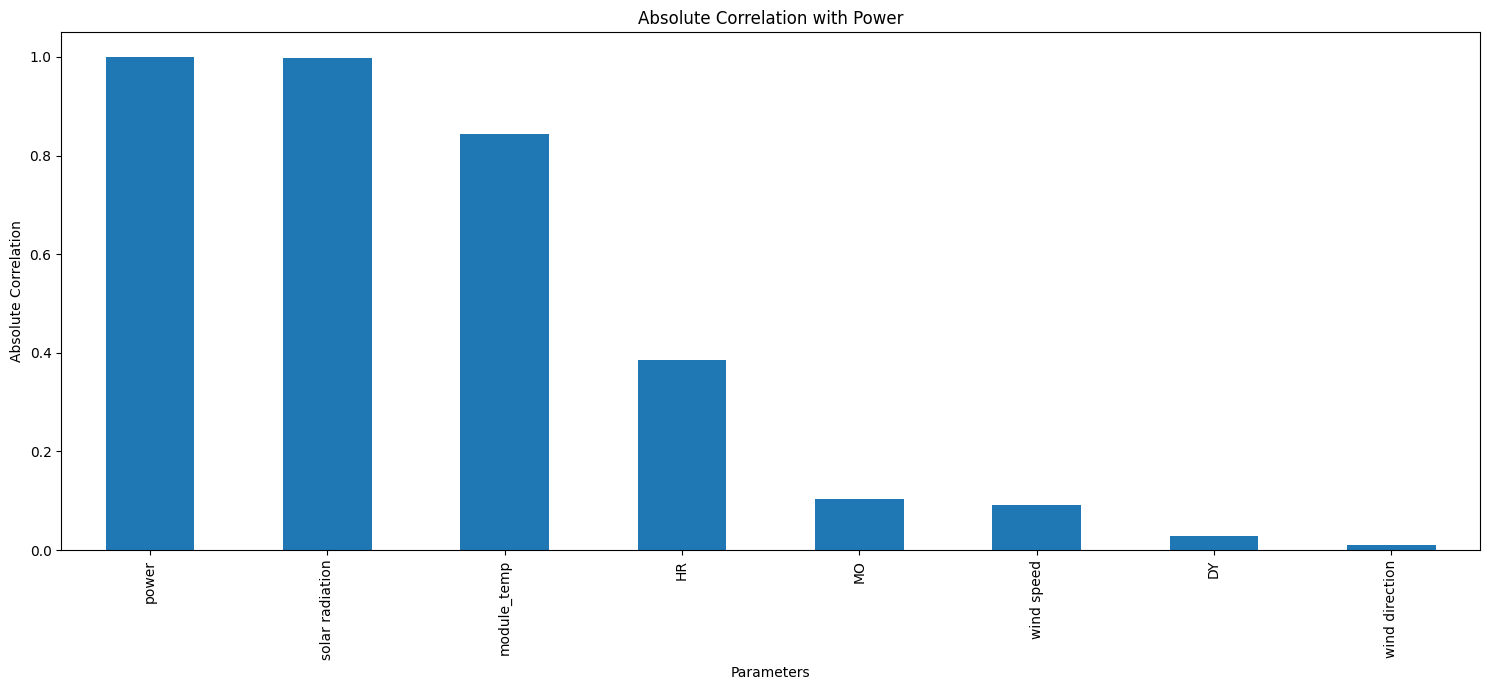

In [34]:
# Calculate the absolute correlation of all parameters with 'power'
abs_corr_with_power = pl['power'].abs().sort_values(ascending=False)

# Display the sorted absolute correlations
print(abs_corr_with_power)

# Plot the sorted absolute correlations
abs_corr_with_power.plot.bar(figsize=(15, 7), rot=90)
plt.title('Absolute Correlation with Power')
plt.xlabel('Parameters')
plt.ylabel('Absolute Correlation')
plt.tight_layout()
plt.show()


In [35]:
# # data1=data1.set_index(['YEAR'])
# # data1.head()
# scaler = MinMaxScaler(feature_range=(0, 1))
# data1 = scaler.fit_transform(data1)

Defining all the functions at one place

If you want to predict next 24 hours directly then change the label df_as_np[i+window_size to i+window_size+24] (here it's already done)

In [36]:
def df_to_X_y3(df, window_size=23):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size-24):
    row = [r for r in df_as_np[i:i+window_size,1:]]
    X.append(row)
    # label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]] this is for 2 variable prediction
# below code is for 1 variable(power ) prediction
    # label = [df_as_np[i+window_size][0]]
# below code is for power of next 24 hours only
    label=df_as_np[i+window_size:i+window_size+24,0]
    y.append(label)
  return np.array(X), np.array(y)

Preprocessing the data

In [39]:
df = pd.read_csv('F:\VidyutAI\data\satelite_hourly_data.csv')

#temp_df['solar radiation']= 'Solar Radiation'
# temp_df = df[['module_temp', 'wind direction','wind speed','solar radiation',]]
temp_df=df.copy()
temp_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\V'
<>:1: SyntaxWarning: invalid escape sequence '\V'
C:\Users\Magnet\AppData\Local\Temp\ipykernel_23072\3229425212.py:1: SyntaxWarning: invalid escape sequence '\V'
  df = pd.read_csv('F:\VidyutAI\data\satelite_hourly_data.csv')


,DY,MO,HR,solar radiation,module_temp,wind direction,wind speed,power
0,1,1,6,70.077,17.175,1.99,3.8,28.702
1,1,1,7,312.699,22.702,1.90,4.6,159.778
2,1,1,8,549.085,27.316,2.14,5.5,279.990
3,1,1,9,735.121,31.169,1.66,6.1,366.577
4,1,1,10,850.934,33.919,1.57,6.4,417.275


Power column is not there in temp_df here

In [40]:
temp_df=temp_df.drop(columns=["power"],axis=1)

In [41]:
temp_df_=temp_df.copy()

In [48]:
# Fix 1: Convert to float before scaling because the month and year are still in integer format it cause error in scaling
temp_df_ = temp_df.astype(float)

# Fix 2: Scale only selected columns
# scaler = MinMaxScaler(feature_range=(0, 1))
scaler= MinMaxScaler()

# columns_to_scale = ['module_temp', 'wind direction', 'sec', 'wind speed', 'solar radiation']

# Fit and transform all values for now if you want to scale select value index the columns
temp_df_.iloc[:,:] = scaler.fit_transform(temp_df)

# Fix 3: Create new DataFrame for scaled values
p_temp_df = pd.concat([df['power'].astype(float), temp_df_], axis=1)

# Fix 4: Scale power separately
scaler_power = MinMaxScaler()
p_temp_df['power'] = scaler_power.fit_transform(p_temp_df[['power']])

In [45]:
p_temp_df.head()

,power,DY,MO,HR,solar radiation,module_temp,wind direction,wind speed
0,0.060391,0.0,0.0,0.000000,0.065055,0.200772,0.185291,0.493333
1,0.336184,0.0,0.0,0.083333,0.290288,0.265381,0.176695,0.600000
2,0.589119,0.0,0.0,0.166667,0.509733,0.319317,0.199618,0.720000
3,0.771304,0.0,0.0,0.250000,0.682436,0.364358,0.153773,0.800000
4,0.877976,0.0,0.0,0.333333,0.789948,0.396505,0.145177,0.840000


In [49]:
# defining the sequence length
window_size=23
# splitting data for train test split
a=round((len(temp_df)-window_size-24)*0.9)
b=round((len(temp_df)-window_size-24)*0.05)
print(a,b)
X3, y3 = df_to_X_y3(p_temp_df)
X3.shape, y3.shape
import numpy as np

# Assuming X3 and y3 are your full dataset
total_samples = len(X3)

# Generate random permutation of indices
indices = np.random.permutation(total_samples)

# Calculate split points
a = int(0.9 * total_samples)
b = int(0.05 * total_samples)

# Split the data
X3_train, y3_train = X3[indices[:a]], y3[indices[:a]]
X3_val, y3_val = X3[indices[a:a+b]], y3[indices[a:a+b]]
X3_test, y3_test = X3[indices[a+b:]], y3[indices[a+b:]]

# Print shapes to verify
print(f"Train: {X3_train.shape}, {y3_train.shape}")
print(f"Validation: {X3_val.shape}, {y3_val.shape}")
print(f"Test: {X3_test.shape}, {y3_test.shape}")

4228 235
Train: (4228, 23, 7), (4228, 24)
Validation: (234, 23, 7), (234, 24)
Test: (236, 23, 7), (236, 24)


# Pytorch Model

In [50]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, random_split
import numpy as np

# model5 in PyTorch: Input (B, 23, 7) -> LSTM(128, return_sequences) -> LSTM(64) -> Dense(64 relu) -> Dense(24 linear)
class LSTMRegressor(nn.Module):
    def __init__(self, input_features=7, seq_len=23, hidden1=128, hidden2=64, fc=64, out_dim=24):
        super().__init__()
        self.lstm1 = nn.LSTM(input_size=input_features, hidden_size=hidden1, batch_first=True)
        self.lstm2 = nn.LSTM(input_size=hidden1, hidden_size=hidden2, batch_first=True)
        self.fc1 = nn.Linear(hidden2, fc)
        self.act = nn.ReLU()
        self.fc2 = nn.Linear(fc, out_dim)

    def forward(self, x):
        # x: (B, 23, 7)
        x, _ = self.lstm1(x)          # (B, 23, 128)
        x, _ = self.lstm2(x)          # (B, 23, 64)
        x = x[:, -1, :]               # (B, 64) - match Keras second LSTM with return_sequences=False
        x = self.act(self.fc1(x))     # (B, 64)
        x = self.fc2(x)               # (B, 24)
        return x

# Utility: RMSE metric
def rmse(pred, target):
    return torch.sqrt(torch.mean((pred - target) ** 2))

# Training loop returning a history dict similar to Keras
def train_model(model, train_tensor, val_tensor, epochs=50, lr=1e-3, batch_size=64, device='cpu', ckpt_path='model5/model5.pt'):
    model.to(device)
    (X_train, y_train) = train_tensor
    (X_val, y_val) = val_tensor

    train_ds = TensorDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).float())
    val_ds   = TensorDataset(torch.from_numpy(X_val).float(),   torch.from_numpy(y_val).float())
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, drop_last=False)
    val_loader   = DataLoader(val_ds,   batch_size=batch_size, shuffle=False, drop_last=False)

    opt = optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.MSELoss()

    history = {'loss': [], 'val_loss': [], 'root_mean_squared_error': [], 'val_root_mean_squared_error': []}
    best_val = float('inf')

    for epoch in range(epochs):
        model.train()
        train_losses = []
        train_rmses = []
        for xb, yb in train_loader:
            xb = xb.to(device)
            yb = yb.to(device)
            pred = model(xb)
            loss = loss_fn(pred, yb)
            opt.zero_grad()
            loss.backward()
            opt.step()
            train_losses.append(loss.item())
            train_rmses.append(rmse(pred, yb).item())

        model.eval()
        val_losses = []
        val_rmses = []
        with torch.no_grad():
            for xb, yb in val_loader:
                xb = xb.to(device)
                yb = yb.to(device)
                pred = model(xb)
                loss = loss_fn(pred, yb)
                val_losses.append(loss.item())
                val_rmses.append(rmse(pred, yb).item())

        tl = float(np.mean(train_losses)) if train_losses else np.nan
        tr = float(np.mean(train_rmses)) if train_rmses else np.nan
        vl = float(np.mean(val_losses)) if val_losses else np.nan
        vr = float(np.mean(val_rmses)) if val_rmses else np.nan

        history['loss'].append(tl)
        history['root_mean_squared_error'].append(tr)
        history['val_loss'].append(vl)
        history['val_root_mean_squared_error'].append(vr)

        # checkpoint best val loss
        if vl < best_val:
            best_val = vl
            torch.save({'model_state_dict': model.state_dict()}, ckpt_path)

        print(f"Epoch {epoch+1:03d} | loss {tl:.6f} rmse {tr:.6f} | val_loss {vl:.6f} val_rmse {vr:.6f}")

    return history


Epoch 001 | loss 0.037949 rmse 0.170720 | val_loss 0.011175 val_rmse 0.103700
Epoch 002 | loss 0.013191 rmse 0.112281 | val_loss 0.012210 val_rmse 0.108926
Epoch 003 | loss 0.012065 rmse 0.107169 | val_loss 0.011762 val_rmse 0.106738
Epoch 004 | loss 0.011578 rmse 0.105018 | val_loss 0.009118 val_rmse 0.093776
Epoch 005 | loss 0.011165 rmse 0.102778 | val_loss 0.008446 val_rmse 0.089635
Epoch 006 | loss 0.010775 rmse 0.101281 | val_loss 0.008836 val_rmse 0.092120
Epoch 007 | loss 0.010455 rmse 0.099504 | val_loss 0.008757 val_rmse 0.091744
Epoch 008 | loss 0.010329 rmse 0.099016 | val_loss 0.008038 val_rmse 0.087682
Epoch 009 | loss 0.010089 rmse 0.097985 | val_loss 0.007708 val_rmse 0.085651
Epoch 010 | loss 0.010042 rmse 0.097417 | val_loss 0.007780 val_rmse 0.085921
Epoch 011 | loss 0.009810 rmse 0.096175 | val_loss 0.007570 val_rmse 0.084691
Epoch 012 | loss 0.009660 rmse 0.095542 | val_loss 0.007816 val_rmse 0.086215
Epoch 013 | loss 0.009531 rmse 0.095009 | val_loss 0.007482 val_

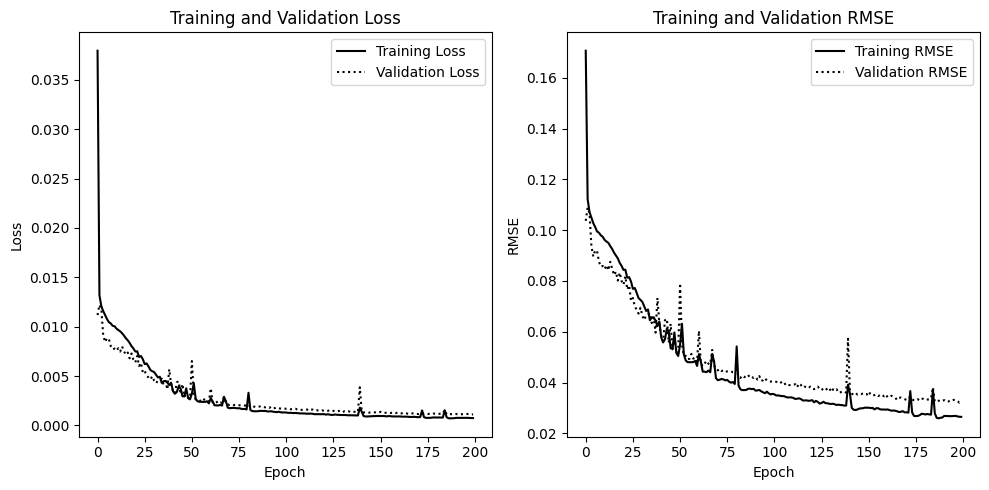

In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Assume numpy arrays prepared as in Keras code:
# X3_train, y3_train, X3_val, y3_val, X3_test, y3_test with shapes:
# X: (N, 23, 7), y: (N, 24)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

SEED = 42
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
np.random.seed(SEED)

model5_torch = LSTMRegressor(input_features=7, seq_len=23, hidden1=256, hidden2=128, fc=32, out_dim=24)
history = train_model(
    model5_torch,
    train_tensor=(X3_train, y3_train),
    val_tensor=(X3_val, y3_val),
    epochs=200, lr=1e-3, batch_size=8, device=device,
    ckpt_path='model5/model5.pt'
)
# import os
# ckpt_path = 'model5/model5.pt'
# os.makedirs(os.path.dirname(ckpt_path), exist_ok=True)  # ensure parent exists

# history = train_model(
#     model5_torch,
#     train_tensor=(X3_train, y3_train),
#     val_tensor=(X3_val, y3_val),
#     epochs=10, lr=1e-3, batch_size=64, device=device,
#     ckpt_path=ckpt_path
# )


# Plot training/validation loss and RMSE analogous to Keras
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history['loss'], label='Training Loss', ls='-', color='black')
plt.plot(history['val_loss'], label='Validation Loss', ls=':', color='black')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history['root_mean_squared_error'], label='Training RMSE', ls='-', color='black')
plt.plot(history['val_root_mean_squared_error'], label='Validation RMSE', ls=':', color='black')
plt.title('Training and Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()


[14, 15, 16, 17, 18, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 6, 7, 8, 9, 10, 11]


C:\Users\Magnet\AppData\Local\Temp\ipykernel_23072\2766775318.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  day = int(np.ceil(upscaled[:, 0]))
C:\Users\Magnet\AppData\Local\Temp\ipykernel_23072\2766775318.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mo  = int(np.ceil(upscaled[:, 1]))
C:\Users\Magnet\AppData\Local\Temp\ipykernel_23072\2766775318.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hr  = int(np.ceil(upscaled[:, 2]))


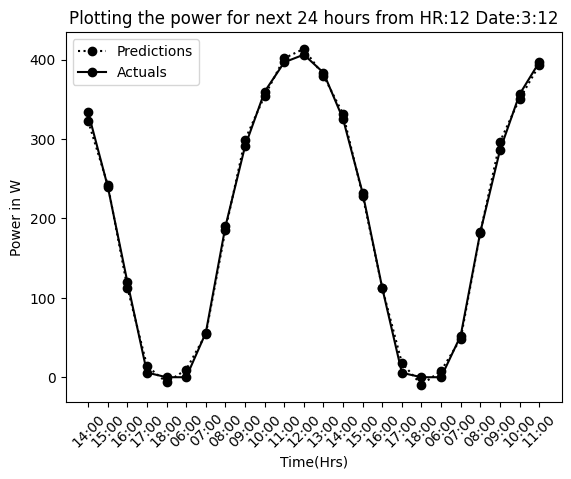

C:\Users\Magnet\AppData\Local\Temp\ipykernel_23072\2766775318.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  day = int(np.ceil(upscaled[:, 0]))
C:\Users\Magnet\AppData\Local\Temp\ipykernel_23072\2766775318.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mo  = int(np.ceil(upscaled[:, 1]))
C:\Users\Magnet\AppData\Local\Temp\ipykernel_23072\2766775318.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hr  = int(np.ceil(upscaled[:, 2]))


[16, 17, 18, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 6, 7, 8, 9, 10, 11, 12, 13]


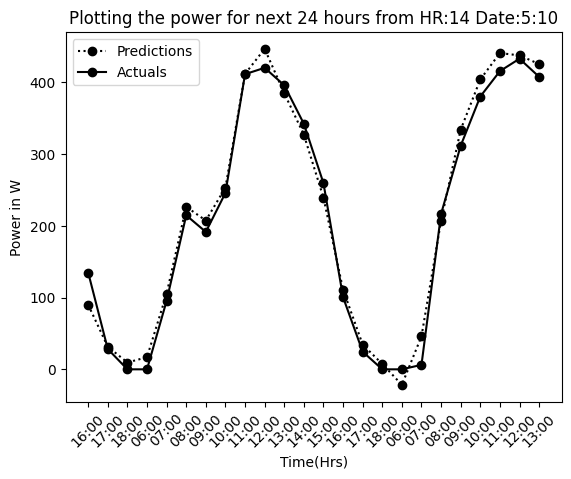

[14, 15, 16, 17, 18, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 6, 7, 8, 9, 10, 11]


C:\Users\Magnet\AppData\Local\Temp\ipykernel_23072\2766775318.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  day = int(np.ceil(upscaled[:, 0]))
C:\Users\Magnet\AppData\Local\Temp\ipykernel_23072\2766775318.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mo  = int(np.ceil(upscaled[:, 1]))
C:\Users\Magnet\AppData\Local\Temp\ipykernel_23072\2766775318.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hr  = int(np.ceil(upscaled[:, 2]))


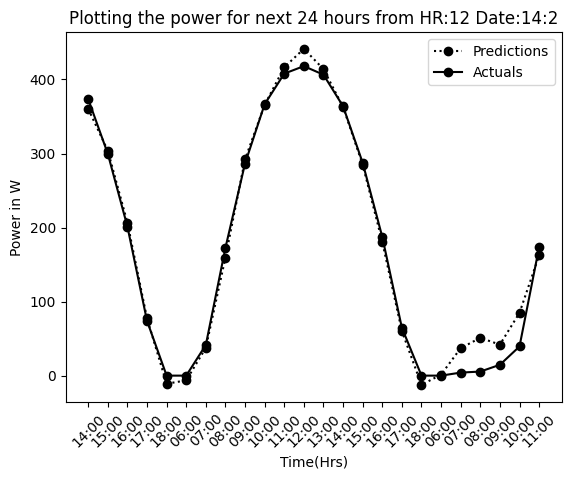

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Assumptions:
# - scaler is the MinMax/Standard scaler for the full input feature space used before splitting.
# - scaler_power is a separate scaler fit only on the power target column used to scale y.
# - X3_test, y3_test are numpy arrays as used above.
# - The last timestep index is 22 (0-based) and its feature vector includes [day, month, hour] in specific positions.

def plot_predictions_one_instance_torch(model, X, y, instance, scaler, scaler_power, device='cpu'):
    model.eval()
    with torch.no_grad():
        xb = torch.from_numpy(X[instance:instance+1]).float().to(device)
        pred = model(xb).cpu().numpy()[0]  # shape (24,)

    actuals = y[instance]                 # shape (24,)

    # Inverse scale for power only
    predictions_upscaled = scaler_power.inverse_transform(pred.reshape(-1,1)).reshape(-1)
    actuals_upscaled     = scaler_power.inverse_transform(actuals.reshape(-1,1)).reshape(-1)

    # Reconstruct time stamps from the last step features
    upscaled = scaler.inverse_transform(X[instance, 22].reshape(1, -1))  # original feature-scale
    day = int(np.ceil(upscaled[:, 0]))
    mo  = int(np.ceil(upscaled[:, 1]))
    hr  = int(np.ceil(upscaled[:, 2]))

    time_stamps = []
    hr_ = hr + 1
    for i in range(24):
        if hr_ > 17:
            hr_ = 6
            time_stamps.append(hr_)
        else:
            hr_ += 1
            time_stamps.append(hr_)

    print(time_stamps)

    plt.title(f'Plotting the power for next 24 hours from HR:{hr} Date:{day}:{mo}')
    plt.xlabel('Time(Hrs)')
    plt.xticks(range(24), [f"{h:02d}:00" for h in time_stamps], rotation=45)
    plt.ylabel('Power in W')
    plt.plot(predictions_upscaled, label='Predictions', ls=':', marker='o', color='black')
    plt.plot(actuals_upscaled,     label='Actuals',     ls='-', marker='o', color='black')
    plt.legend()
    plt.show()

instances = [3, 100, 200]
for inst in instances:
    plot_predictions_one_instance_torch(model5_torch, X3_test, y3_test, inst, scaler, scaler_power, device=device)


In [69]:
# Load best weights
# state = torch.load('model5/model5.pt', map_location=device)
# model5_torch.load_state_dict(state['model_state_dict'])
# model5_torch.eval().to(device)

with torch.no_grad():
    y_pred_test = []
    B = 256
    for i in range(0, len(X3_test), B):
        xb = torch.from_numpy(X3_test[i:i+B]).float().to(device)
        pred = model5_torch(xb).cpu().numpy()
        y_pred_test.append(pred)
    y_pred_test = np.concatenate(y_pred_test, axis=0)  # shape (N_test, 24)

r2_test = r2_score(y3_test, y_pred_test)
print('R2_Score:', r2_test)


R2_Score: 0.9847688309916013


In [73]:
import pickle

with open('powerpredict.pkl', 'wb') as f:
    pickle.dump(model5_torch, f)

with open('scaler_input.pkl', 'wb') as f:
    pickle.dump(scaler, f)    

with open('scaler_power.pkl', 'wb') as f:
    pickle.dump(scaler_power, f)

print("Model saved successfully.")

Model saved successfully.
